<h1>Import des librairies</h1>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<h2>Import des données et vérification des champs</h2>

In [4]:
# Charger les données
train_data = pd.read_csv("cars_data-reg.csv")

# Afficher les 5 premières lignes des données
train_data.head()

,Kilométrage,Année_Fabrication,Puissance,Consommation,Nombre_Portes,Vitesse_Max,Marque,Prix
0,89517,2008,210,82.094399,2,219,1,22902.765158
1,97836,2018,274,16.331939,3,291,1,29512.466062
2,50396,2011,133,29.778738,2,231,2,13029.153685
3,143982,2012,243,41.556940,3,238,1,27292.752562
4,224514,2021,326,87.855383,5,281,2,46817.128341


In [5]:
train_data.describe()

,Kilométrage,Année_Fabrication,Puissance,Consommation,Nombre_Portes,Vitesse_Max,Marque,Prix
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,146302.3380,2011.32600,235.010000,53.614884,3.514000,225.039000,2.000000,32355.779868
std,86102.8942,6.87772,64.058218,27.336137,1.159806,43.022953,0.811578,10368.675552
min,728.0000,2000.00000,125.000000,5.353732,2.000000,150.000000,1.000000,5666.794333
25%,70326.0000,2005.00000,181.000000,29.955260,2.000000,188.000000,1.000000,24671.936893
50%,143958.5000,2011.00000,237.000000,53.356480,4.000000,226.000000,2.000000,32058.370765
75%,223790.2500,2017.00000,288.000000,77.950275,5.000000,262.000000,3.000000,39789.299440
max,299790.0000,2023.00000,349.000000,99.979611,5.000000,300.000000,3.000000,59640.769068


Ici nous regardons les informations sur nos données, nous vérifions les différentes colonnes, si tout semble bon, bon format des données... Via la fonction describe, on récupère des informations sur notre jeu de données qui sont intéressantes, comme vous pouvez le voir plus haut.

<h2>Génération de la matrice de corrélation</h2>

<Axes: >

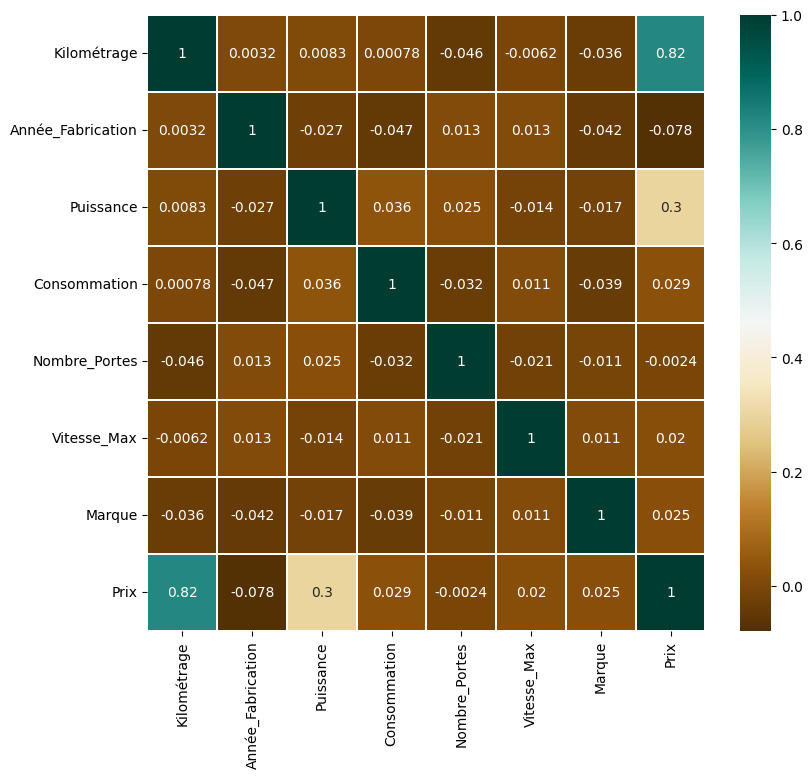

In [10]:
corr_matrix = train_data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

On a généré une matrice de corrélation pour visualiser les relations entre les différentes caractéristiques de nos données de vente de voiture. On a fait le choix d utiliser la librairie Seaborn pour faciliter l affichage tout en paramètrant le rendu. cela nous permet de mieux voirs les corrélations. 

<h2>Analyse de la matrice de corrélation</h2>

Selon notre matrice, nous pouvons voir qu'il y a une forte corrélation positive entre le <strong>Kilométrage</strong> et le prix. Nous remarquons également que la deuxième variable qui corrèle le plus avec le prix est la <strong>puissance</strong>

<li><strong>Kilométrage :</strong> Plus une voiture a de kilomètres, plus on peut s'attendre à ce que sa valeur diminue, car cela peut être un indicateur de l'usure générale et de la proximité de la nécessité de remplacer des pièces.</li>

<li><strong>Puissance :</strong> Les voitures avec plus de puissance sont souvent perçues comme plus désirables ou performantes et peuvent donc coûter plus cher.</li>

<h1>Preprocessing</h1>

## Supprimer les colonnes inutiles
- Nous pouvons supprimer les colonnes inutiles car ils ne contribuent pas à la classe cible.

In [13]:
train_data = train_data.drop(columns=['Année_Fabrication', 'Consommation', 'Nombre_Portes','Vitesse_Max', 'Marque'])

In [14]:
train_data.head()

,Kilométrage,Puissance,Prix
0,89517,210,22902.765158
1,97836,274,29512.466062
2,50396,133,13029.153685
3,143982,243,27292.752562
4,224514,326,46817.128341


Nous remarquons que nos données pour la régression sont biens selectionnées après la suppression des données qui nous semblent inutiles

<h1>Régression Linéaire</h1>

In [16]:
X = train_data[['Kilométrage', 'Puissance']]  # Variables explicatives
y = train_data['Prix']  # Variable cible

# On divise nos données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

# Créez une instance du modèle de régression linéaire
model = LinearRegression()

# Entraînez le modèle en utilisant l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faites des prédictions en utilisant l'ensemble de test
y_pred = model.predict(X_test)

# Évaluez la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Coefficient de détermination (R^2): {r2}")

# Vous pouvez également obtenir les coefficients de la régression
print(f"Coefficient pour Kilométrage: {model.coef_[0]}")
print(f"Coefficient pour Puissance: {model.coef_[1]}")

Erreur quadratique moyenne (MSE): 23896767.933144882
Coefficient de détermination (R^2): 0.7797732184365638
Coefficient pour Kilométrage: 0.09610353492442036
Coefficient pour Puissance: 48.01467206143874


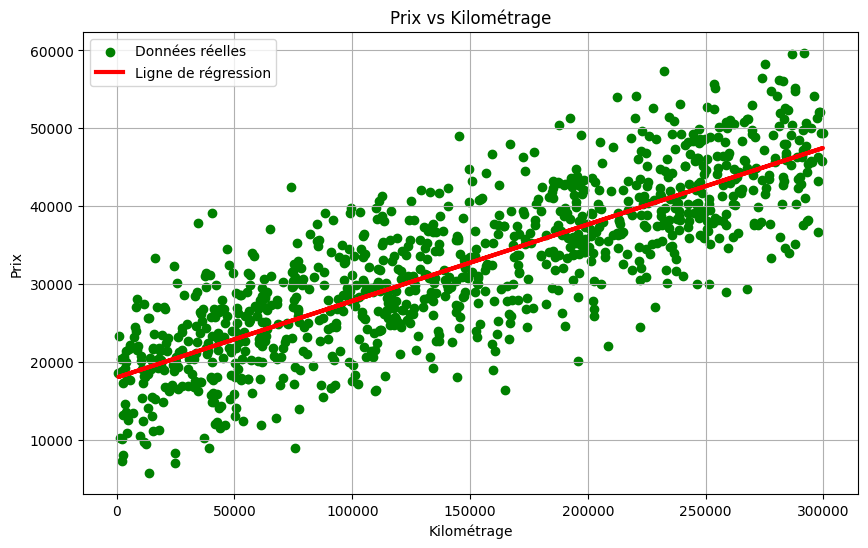

In [30]:
# Calcul des coefficients de la régression linéaire pour la Puissance
x_bar = np.mean(X['Kilométrage'])
numer = [(X['Kilométrage'][i] - x_bar) * (y[i] - y_bar) for i in range(m)]
denom = [(X['Kilométrage'][i] - x_bar)**2 for i in range(m)]
b1_puissance = np.sum(numer) / np.sum(denom)
b0_puissance = y_bar - b1_puissance * x_bar

# Prédiction des valeurs y_hat basées sur la régression linéaire pour la Puissance
y_hat_puissance = b0_puissance + b1_puissance * X['Kilométrage']

# Création du graphique pour la Puissance
plt.figure(figsize=(10, 6))
plt.grid()
plt.scatter(X['Kilométrage'], y, color='green', label='Données réelles')
plt.plot(X['Kilométrage'], y_hat_puissance, color='red', linewidth=3, label='Ligne de régression')  # Ligne de régression plus épaisse
plt.title('Prix vs Kilométrage')
plt.xlabel('Kilométrage')
plt.ylabel('Prix')
plt.legend()
plt.show()


In [31]:
from sklearn.linear_model import LinearRegression

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X[['Kilométrage']], y)

# Coefficients du modèle
b0 = model.intercept_
b1 = model.coef_[0]

# Affichage des résultats
print(f"Intercept (b0): {b0}, Slope (b1): {b1}")


Intercept (b0): 17962.67679522877, Slope (b1): 0.09837917335677199


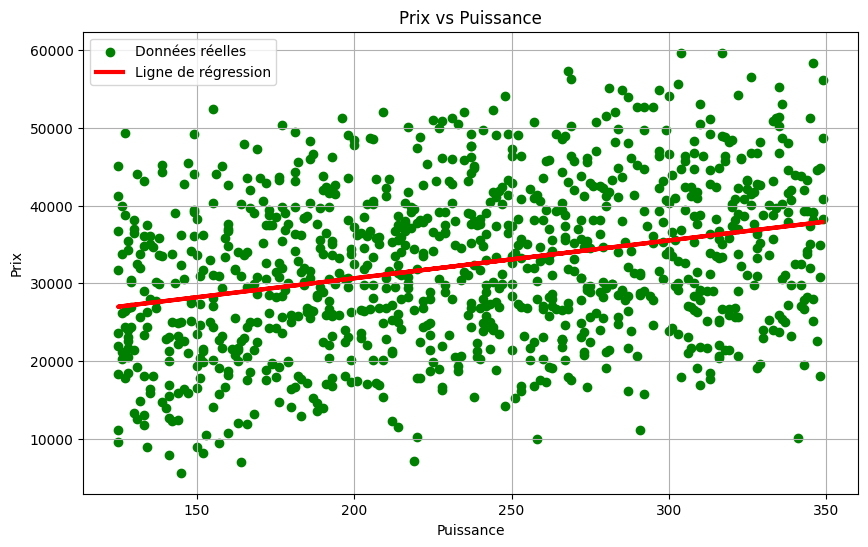

In [29]:
# Calcul des coefficients de la régression linéaire pour la Puissance
x_bar = np.mean(X['Puissance'])
numer = [(X['Puissance'][i] - x_bar) * (y[i] - y_bar) for i in range(m)]
denom = [(X['Puissance'][i] - x_bar)**2 for i in range(m)]
b1_puissance = np.sum(numer) / np.sum(denom)
b0_puissance = y_bar - b1_puissance * x_bar

# Prédiction des valeurs y_hat basées sur la régression linéaire pour la Puissance
y_hat_puissance = b0_puissance + b1_puissance * X['Puissance']

# Création du graphique pour la Puissance
plt.figure(figsize=(10, 6))
plt.grid()
plt.scatter(X['Puissance'], y, color='green', label='Données réelles')
plt.plot(X['Puissance'], y_hat_puissance, color='red', linewidth=3, label='Ligne de régression')  # Ligne de régression plus épaisse
plt.title('Prix vs Puissance')
plt.xlabel('Puissance')
plt.ylabel('Prix')
plt.legend()
plt.show()
